In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [134]:
playstore_data = pd.read_csv(r'C:\Users\Syed Azeemuddin\Downloads\sem7 notes\HT\datasets\Play Store Data.csv')

In [5]:
print(df.shape)
df.head()

(10841, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [135]:
playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### Except "Rating" all other features are Object data type.
We will convert "Reviews, Size, Installs and Price" into numerical Dtype.

In [153]:
playstore_data.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## Data Cleaning

#### Removing Duplicates of App

In [136]:
playstore_data['App'].duplicated().value_counts()

False    9660
True     1181
Name: App, dtype: int64

1181 Apps are found to be duplicates.

In [139]:
playstore_data.loc[playstore_data['App'].duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4M,"100,000+",Free,0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,"1,000,000+",Free,0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410,60M,"50,000+",Free,0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12M,"1,000,000+",Free,0,Everyone,Shopping,"July 30, 2018",3.9,4.4 and up


In [142]:
#Dropping the duplicates
df = playstore_data.drop_duplicates('App')

In [143]:
df.shape

(9660, 13)

In [152]:
#Finding null values
df.isna().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Over 1463 null values under "Rating" column which is a numerical feature.

Everyone           7903
Teen               1036
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64


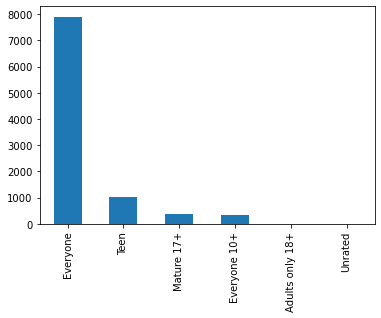

In [150]:
#Finding the "Content Rating"
df['Content Rating'].value_counts().plot(kind='bar')
print(df['Content Rating'].value_counts())

Apps rated "Everyone" are found to be the most frequent followed by "Teen". While there are very few apps under "Adults only 18+" and "Unrated".

<AxesSubplot:>

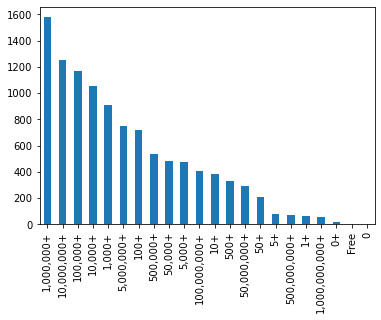

In [7]:
df['Installs'].value_counts().plot(kind='bar')

## Top Categories

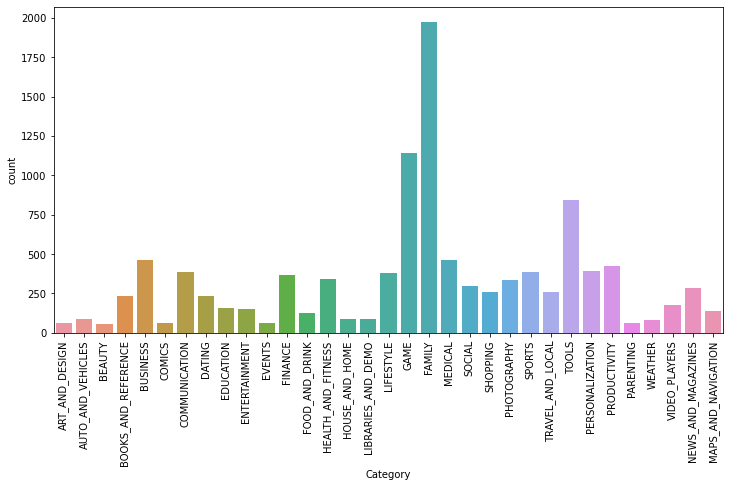

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(df['Category'])
plt.xticks(rotation=90)
plt.show()

## Top 5 Categories

<AxesSubplot:xlabel='Category', ylabel='count'>

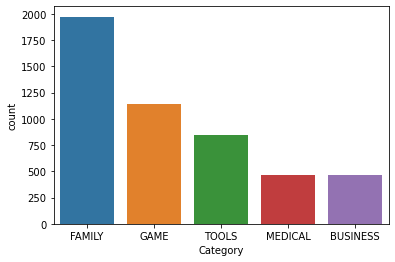

In [12]:
sns.countplot(x=df['Category'],order=pd.value_counts(df['Category']).iloc[:5].index)

<AxesSubplot:xlabel='Type', ylabel='count'>

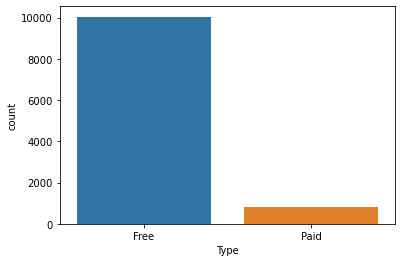

In [13]:
sns.countplot(df['Type'])

In [14]:
df['Type'].value_counts()

Free    10040
Paid      800
Name: Type, dtype: int64

In [15]:
df['Content Rating'].value_counts()

Everyone           8715
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

(0.0, 7.5)

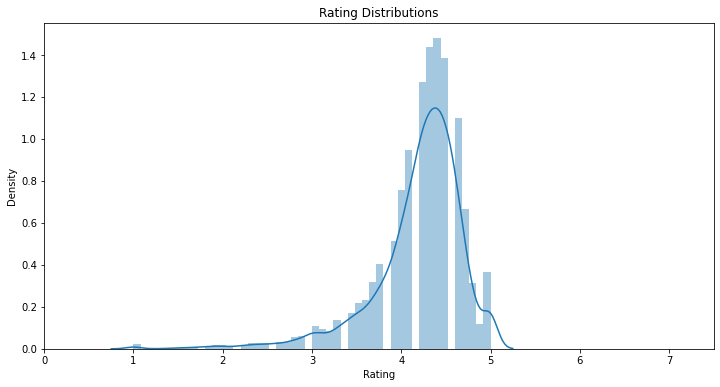

In [16]:
plt.figure(figsize=(12,6))
plt.title('Rating Distributions')
sns.distplot(df['Rating'])
plt.xlim(0,7.5)

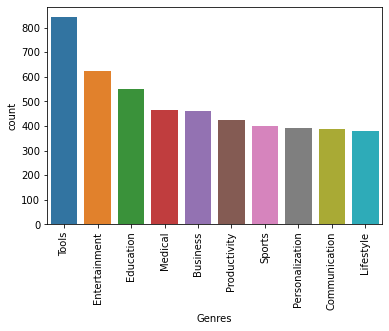

In [17]:
sns.countplot(x=df['Genres'],order=pd.value_counts(df['Genres']).iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

In [18]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [20]:
df.shape

(10841, 13)

In [22]:
a = '19M'
a.replace('M','MB')

'19MB'

In [23]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [24]:
df[df['Size']=='87M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1714,Wordscapes,GAME,4.8,230710,87M,"10,000,000+",Free,0,Everyone,Word,"August 2, 2018",1.0.47,4.1 and up
1765,Wordscapes,GAME,4.8,230727,87M,"10,000,000+",Free,0,Everyone,Word,"August 2, 2018",1.0.47,4.1 and up
1797,Wordscapes,GAME,4.8,230727,87M,"10,000,000+",Free,0,Everyone,Word,"August 2, 2018",1.0.47,4.1 and up
1800,Last Day on Earth: Survival,GAME,4.5,2311785,87M,"10,000,000+",Free,0,Teen,Action,"August 1, 2018",1.9.3,4.1 and up
1889,Wordscapes,GAME,4.8,230849,87M,"10,000,000+",Free,0,Everyone,Word,"August 2, 2018",1.0.47,4.1 and up
4184,Offroad Car H,FAMILY,4.2,1960,87M,"100,000+",Free,0,Everyone,Simulation,"October 6, 2017",1.4,2.3 and up
4327,Last Day on Earth: Survival,GAME,4.5,2308916,87M,"10,000,000+",Free,0,Teen,Action,"August 1, 2018",1.9.3,4.1 and up
4817,War Z 2,FAMILY,4.5,97071,87M,"5,000,000+",Free,0,Teen,Strategy,"April 3, 2018",0.1.219,2.3.3 and up
5948,PBA® Bowling Challenge,SPORTS,4.3,242096,87M,"10,000,000+",Free,0,Everyone,Sports,"August 2, 2018",3.4.4,4.1 and up
6179,Es-Bg Offline Voice Translator,TRAVEL_AND_LOCAL,NaN,1,87M,10+,Paid,$1.49,Everyone,Travel & Local,"March 19, 2017",2.55,3.0 and up


In [25]:
a[-1] 

'M'

In [26]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [27]:
df[df['Price']=='$400.00']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,"10,000+",Paid,$400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up


In [28]:
df['Price']=df['Price'].apply(lambda x:x.replace('$',''))

<AxesSubplot:title={'center':'Android Version Compatibility'}>

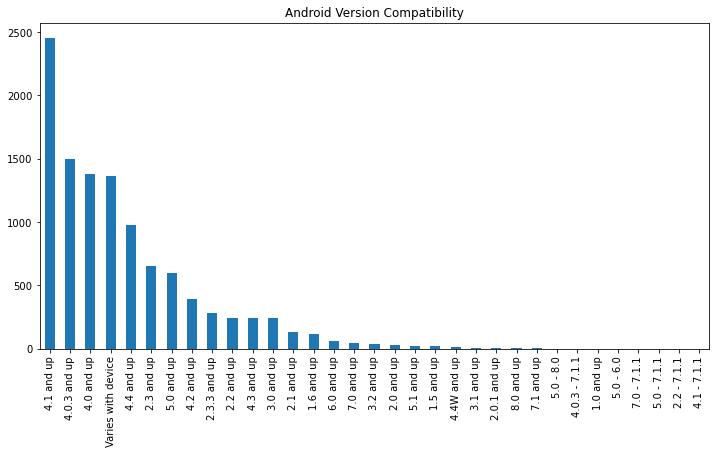

In [29]:
plt.figure(figsize=(12,6))
plt.title('Android Version Compatibility')
df['Android Ver'].value_counts().plot(kind='bar')

In [30]:
df['Android Ver'].value_counts(normalize=True)

4.1 and up            0.226128
4.0.3 and up          0.138481
4.0 and up            0.126949
Varies with device    0.125657
4.4 and up            0.090414
2.3 and up            0.060153
5.0 and up            0.055448
4.2 and up            0.036350
2.3.3 and up          0.025925
2.2 and up            0.022511
4.3 and up            0.022419
3.0 and up            0.022235
2.1 and up            0.012363
1.6 and up            0.010702
6.0 and up            0.005536
7.0 and up            0.003875
3.2 and up            0.003321
2.0 and up            0.002952
5.1 and up            0.002214
1.5 and up            0.001845
4.4W and up           0.001107
3.1 and up            0.000923
2.0.1 and up          0.000646
8.0 and up            0.000554
7.1 and up            0.000277
5.0 - 8.0             0.000185
4.0.3 - 7.1.1         0.000185
1.0 and up            0.000185
5.0 - 6.0             0.000092
7.0 - 7.1.1           0.000092
5.0 - 7.1.1           0.000092
2.2 - 7.1.1           0.000092
4.1 - 7.

In [31]:
df['Price']=df['Price'].astype(float)

<AxesSubplot:>

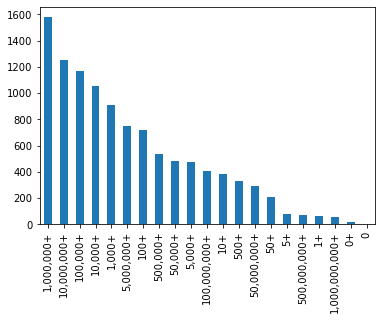

In [32]:
df['Installs'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Installs', ylabel='Density'>

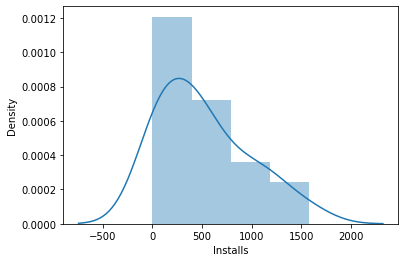

In [33]:
sns.distplot(df['Installs'].value_counts())

In [34]:
df['Price']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10836    0.0
10837    0.0
10838    0.0
10839    0.0
10840    0.0
Name: Price, Length: 10841, dtype: float64

In [35]:
df['Reviews']=df['Reviews'].astype(float)

In [36]:
df.describe()

,Rating,Reviews,Price
count,9367.000000,1.084100e+04,10841.000000
mean,4.191513,4.441119e+05,1.027273
std,0.515735,2.927629e+06,15.948971
min,1.000000,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,0.000000
50%,4.300000,2.094000e+03,0.000000
75%,4.500000,5.476800e+04,0.000000
max,5.000000,7.815831e+07,400.000000


In [37]:
#Apps with 1bill+ installs
df[df['Installs']=='1,000,000,000+']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233.0,Varies with device,"1,000,000,000+",Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847.0,Varies with device,"1,000,000,000+",Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,Varies with device,"1,000,000,000+",Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995.0,Varies with device,"1,000,000,000+",Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324.0,Varies with device,"1,000,000,000+",Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
341,Hangouts,COMMUNICATION,4.0,3419249.0,Varies with device,"1,000,000,000+",Free,0.0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,Varies with device,"1,000,000,000+",Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578.0,Varies with device,"1,000,000,000+",Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
386,Hangouts,COMMUNICATION,4.0,3419433.0,Varies with device,"1,000,000,000+",Free,0.0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169.0,Varies with device,"1,000,000,000+",Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device


In [38]:
df[df['Installs']=='1,000,000,000+'].nunique()

App               20
Category          12
Rating             8
Reviews           49
Size               3
Installs           1
Type               1
Price              1
Content Rating     3
Genres            11
Last Updated      10
Current Ver        3
Android Ver        3
dtype: int64

<AxesSubplot:xlabel='Price'>

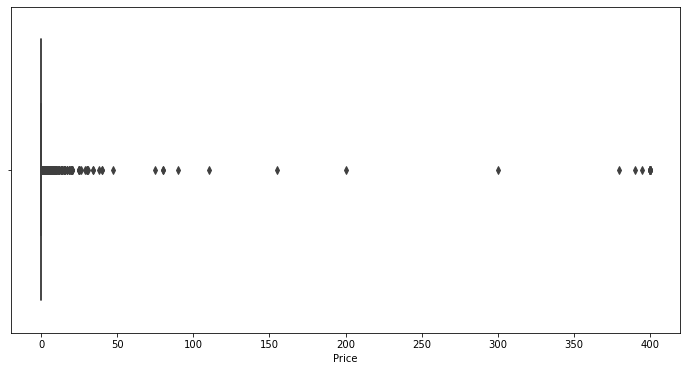

In [39]:
plt.figure(figsize=(12,6))
sns.boxplot(df['Price'])

In [40]:

paid=df[df['Price']>0]

In [41]:
paid['Price'].value_counts()

0.99      148
2.99      129
1.99       73
4.99       72
3.99       63
         ... 
19.90       1
28.99       1
389.99      1
1.50        1
2.50        1
Name: Price, Length: 91, dtype: int64

In [42]:
paid['Price'].describe()

count    800.000000
mean      13.920837
std       57.195358
min        0.990000
25%        1.490000
50%        2.990000
75%        4.990000
max      400.000000
Name: Price, dtype: float64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  float64
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.1+ MB


In [44]:
df['Size'].value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
39k                      1
811k                     1
175k                     1
154k                     1
246k                     1
Name: Size, Length: 461, dtype: int64

In [45]:
df['Size'].replace('Varies with device', np.nan, inplace = True ) 

In [46]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', nan, '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M', '8.9M', '3.9M',
       '2.9M', '38M', '32M', '5.4M', '18M', '1.1M', '2.2M', '4.5M',
       '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M', '7.1M', '3.7M',
       '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M', '4.9M', '9.5M',
       '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M',
       '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M', '23k', '6.5M',
       '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M', '8.3M', '4.3M',
       '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M', '5.1M', '61M',
       '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M', '6.2M', '18k',
       

In [47]:
df['Size']=df['Size'].apply(lambda x:str(x).replace('M',''))
df['Size']=df['Size'].apply(lambda x:str(x).replace('k','e-3'))

In [48]:
df['Size']=df['Size'].astype(float)

In [49]:
df['Size'].unique()

array([1.90e+01, 1.40e+01, 8.70e+00, 2.50e+01, 2.80e+00, 5.60e+00,
       2.90e+01, 3.30e+01, 3.10e+00, 2.80e+01, 1.20e+01, 2.00e+01,
       2.10e+01, 3.70e+01, 2.70e+00, 5.50e+00, 1.70e+01, 3.90e+01,
       3.10e+01, 4.20e+00, 7.00e+00, 2.30e+01, 6.00e+00, 6.10e+00,
       4.60e+00, 9.20e+00, 5.20e+00, 1.10e+01, 2.40e+01,      nan,
       9.40e+00, 1.50e+01, 1.00e+01, 1.20e+00, 2.60e+01, 8.00e+00,
       7.90e+00, 5.60e+01, 5.70e+01, 3.50e+01, 5.40e+01, 2.01e-01,
       3.60e+00, 5.70e+00, 8.60e+00, 2.40e+00, 2.70e+01, 2.50e+00,
       1.60e+01, 3.40e+00, 8.90e+00, 3.90e+00, 2.90e+00, 3.80e+01,
       3.20e+01, 5.40e+00, 1.80e+01, 1.10e+00, 2.20e+00, 4.50e+00,
       9.80e+00, 5.20e+01, 9.00e+00, 6.70e+00, 3.00e+01, 2.60e+00,
       7.10e+00, 3.70e+00, 2.20e+01, 7.40e+00, 6.40e+00, 3.20e+00,
       8.20e+00, 9.90e+00, 4.90e+00, 9.50e+00, 5.00e+00, 5.90e+00,
       1.30e+01, 7.30e+01, 6.80e+00, 3.50e+00, 4.00e+00, 2.30e+00,
       7.20e+00, 2.10e+00, 4.20e+01, 7.30e+00, 9.10e+00, 5.50e

In [50]:
df[df['Size']==9.40e-01]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8225,ReDNAKET DB Normalization Tool,TOOLS,NaN,0.0,0.94,10+,Paid,0.99,Everyone,Tools,"February 3, 2016",1.0.2,5.0 and up


In [51]:
df['Size'].fillna(df.groupby('Category')['Size'].transform('mean'),inplace=True)

In [52]:
df['Size'].describe()

count    10841.000000
mean        21.208278
std         21.054511
min          0.008500
25%          5.900000
50%         14.472162
75%         28.000000
max        100.000000
Name: Size, dtype: float64

In [53]:
df[df['Size']==100.000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1080,Post Bank,FINANCE,4.5,60449.0,100.0,"1,000,000+",Free,0.00,Everyone,Finance,"July 23, 2018",2.9.12,4.0 and up
1565,Talking Babsy Baby: Baby Games,LIFESTYLE,4.0,140995.0,100.0,"10,000,000+",Free,0.00,Everyone,Lifestyle;Pretend Play,"July 16, 2018",9.0,4.0 and up
1758,Hungry Shark Evolution,GAME,4.5,6074334.0,100.0,"100,000,000+",Free,0.00,Teen,Arcade,"July 25, 2018",6.0.0,4.1 and up
1793,Mini Golf King - Multiplayer Game,GAME,4.5,531458.0,100.0,"5,000,000+",Free,0.00,Everyone,Sports,"July 20, 2018",3.04.1,4.0.3 and up
1988,Hungry Shark Evolution,GAME,4.5,6074627.0,100.0,"100,000,000+",Free,0.00,Teen,Arcade,"July 25, 2018",6.0.0,4.1 and up
2299,Navi Radiography Pro,MEDICAL,4.7,11.0,100.0,500+,Paid,15.99,Everyone,Medical,"January 14, 2018",1.2.0,4.0.3 and up
3973,Hungry Shark Evolution,GAME,4.5,6071542.0,100.0,"100,000,000+",Free,0.00,Teen,Arcade,"July 25, 2018",6.0.0,4.1 and up
4690,Vi Trainer,HEALTH_AND_FITNESS,3.6,124.0,100.0,"5,000+",Free,0.00,Everyone,Health & Fitness,"August 2, 2018",2.0.0.11,5.0 and up
5427,Ultimate Tennis,SPORTS,4.3,183004.0,100.0,"10,000,000+",Free,0.00,Everyone,Sports,"July 19, 2018",2.29.3118,4.0.3 and up
5530,The Walking Dead: Our World,GAME,4.0,22435.0,100.0,"1,000,000+",Free,0.00,Teen,Action,"August 1, 2018",1.1.0.3,5.0 and up


In [54]:
df.isna().sum()

App                  0
Category             1
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [55]:
df['Rating'].fillna(df.groupby('Category')['Rating'].transform('mean'),inplace=True)

In [56]:
df.isna().sum()

App               0
Category          1
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            1
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [57]:
df.shape

(10841, 13)

In [58]:
df.dropna(inplace=True)

In [59]:
df.shape

(10829, 13)

<AxesSubplot:xlabel='Rating'>

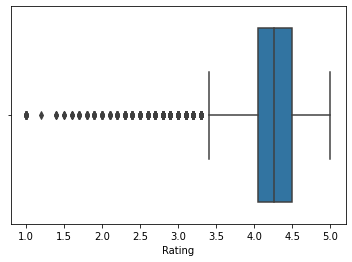

In [61]:
sns.boxplot(df['Rating'])

<AxesSubplot:xlabel='Rating', ylabel='Density'>

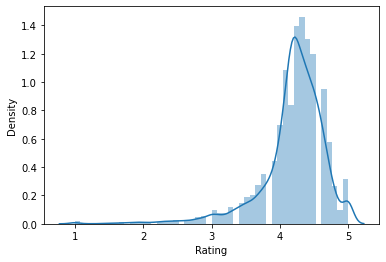

In [62]:
sns.distplot(df['Rating'])

<AxesSubplot:xlabel='Size', ylabel='Density'>

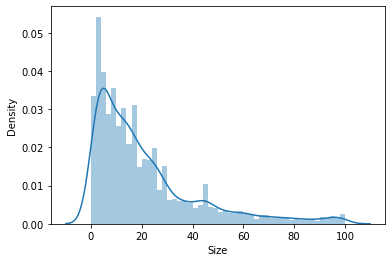

In [63]:
sns.distplot(df['Size'])

In [65]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

In [66]:
def rem(s):
    c=s.replace('+','')
    c.replace(',','')

In [67]:
df['Installs']=df['Installs'].apply(lambda x:x.replace('+',''))
df['Installs']=df['Installs'].apply(lambda x:x.replace(',',''))

In [68]:
df['Installs']=df['Installs'].astype(int)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  float64
 4   Size            10829 non-null  float64
 5   Installs        10829 non-null  int32  
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  float64
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(4), int32(1), object(8)
memory usage: 1.1+ MB


## Top Categories based on Installs(having 1bill+ downloads)

In [70]:
most_installs=df[df['Installs']==1000000000]

<AxesSubplot:>

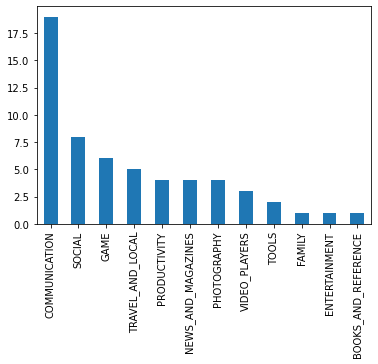

In [71]:
most_installs['Category'].value_counts().plot(kind='bar')

Communication apps are noted to be most frequent when it comes to installs

## Top 5 Categories based on Rating

In [72]:
category_grp = df.groupby(['Category'])

In [73]:
category_grp['Rating'].mean()

Category
ART_AND_DESIGN         4.376159
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.346067
BUSINESS               4.121452
COMICS                 4.155172
COMMUNICATION          4.158537
DATING                 3.970769
EDUCATION              4.389032
ENTERTAINMENT          4.126174
EVENTS                 4.435556
FAMILY                 4.192370
FINANCE                4.131889
FOOD_AND_DRINK         4.166972
GAME                   4.286326
HEALTH_AND_FITNESS     4.277104
HOUSE_AND_HOME         4.197368
LIBRARIES_AND_DEMO     4.179396
LIFESTYLE              4.094904
MAPS_AND_NAVIGATION    4.051613
MEDICAL                4.189143
NEWS_AND_MAGAZINES     4.132189
PARENTING              4.300000
PERSONALIZATION        4.335403
PHOTOGRAPHY            4.192114
PRODUCTIVITY           4.211396
SHOPPING               4.259664
SOCIAL                 4.255598
SPORTS                 4.223511
TOOLS                  4.047230
TRAVEL_AND_LOCAL       4.109292

In [74]:
category_grp['Rating'].mean().sort_values(ascending=False).iloc[:5]

Category
EVENTS                 4.435556
EDUCATION              4.389032
ART_AND_DESIGN         4.376159
BOOKS_AND_REFERENCE    4.346067
PERSONALIZATION        4.335403
Name: Rating, dtype: float64

### Top 5 Categories based on Ratings are:
1. Events
2. Education
3. Art and Design
4. Books and Reference
5. Personalization

### Top 5 Categories based on App Rating and having 1,00,000+ installs

In [75]:
apps_with_10k = df[df['Installs']>=10000]

In [76]:
category_grp10k = apps_with_10k.groupby(['Category'])

In [77]:
category_grp10k['Rating'].mean().sort_values(ascending=False).iloc[:6]

Category
EDUCATION              4.383695
BOOKS_AND_REFERENCE    4.369913
ART_AND_DESIGN         4.344692
EVENTS                 4.338354
PERSONALIZATION        4.326874
PARENTING              4.325455
Name: Rating, dtype: float64

In [78]:
df[df['Category']=='EVENTS']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1004,All Events in City,EVENTS,4.000000,3782.0,9.500000,100000,Free,0.0,Everyone,Events,"June 12, 2018",8.4,4.0.3 and up
1005,Ticketmaster Event Tickets,EVENTS,4.000000,40113.0,36.000000,5000000,Free,0.0,Everyone,Events,"July 23, 2018",Varies with device,Varies with device
1006,Reminder,EVENTS,4.500000,7074.0,6.300000,500000,Free,0.0,Everyone,Events,"June 25, 2018",1.57,4.1 and up
1007,Birdays - Birthday reminder,EVENTS,4.500000,2153.0,5.900000,50000,Free,0.0,Everyone,Events,"December 14, 2017",1.5.0,4.1 and up
1008,"StubHub - Tickets to Sports, Concerts & Events",EVENTS,4.000000,26089.0,13.963754,5000000,Free,0.0,Everyone,Events,"August 2, 2018",4.2.1,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9659,FAST EO,EVENTS,5.000000,1.0,13.963754,10,Free,0.0,Everyone,Events,"May 15, 2018",1.0.3,4.1 and up
9699,eP Scanner,EVENTS,4.435556,0.0,20.000000,100,Free,0.0,Everyone,Events,"October 13, 2017",1.5,4.4 and up
10105,EY Belgium Inhouse Day 2018,EVENTS,4.435556,0.0,24.000000,10,Free,0.0,Everyone,Events,"May 14, 2018",18.4.8.0,4.1 and up
10605,FL Bankers,EVENTS,4.435556,0.0,3.400000,10,Free,0.0,Everyone,Events,"June 5, 2018",1.0.1,4.2 and up


In [79]:
#Least Rated Category
category_grp10k['Rating'].mean().sort_values(ascending=False).iloc[-1:]

Category
DATING    3.944444
Name: Rating, dtype: float64

In [80]:
# Dating category is rated the least

## Top 5 Genres based on Ratings

In [81]:
gen_grp = df.groupby(['Genres'])

In [82]:
gen_grp['Rating'].mean().sort_values(ascending=False).iloc[:5]

Genres
Board;Pretend Play             4.8
Comics;Creativity              4.8
Health & Fitness;Education     4.7
Adventure;Brain Games          4.6
Strategy;Action & Adventure    4.6
Name: Rating, dtype: float64

In [83]:
cat_gen=df.groupby(['Category','Genres'])

In [84]:
cat_gen['Rating'].mean().sort_values(ascending=False).iloc[:20]

Category       Genres                       
COMICS         Comics;Creativity                4.800000
FAMILY         Board;Pretend Play               4.800000
GAME           Simulation;Action & Adventure    4.700000
FAMILY         Health & Fitness;Education       4.700000
               Entertainment;Creativity         4.650000
EDUCATION      Education;Pretend Play           4.625000
FAMILY         Strategy;Action & Adventure      4.600000
               Puzzle;Education                 4.600000
               Adventure;Brain Games            4.600000
GAME           Sports                           4.535714
FAMILY         Music;Music & Video              4.533333
GAME           Puzzle                           4.526190
EDUCATION      Education;Education              4.520000
FAMILY         Strategy;Education               4.500000
               Racing;Pretend Play              4.500000
GAME           Casual;Action & Adventure        4.500000
               Simulation;Education        

## Top 3 Apps in Paid and Free

In [85]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [86]:
paid_10k_apps = apps_with_10k[apps_with_10k['Type']=='Paid']

<AxesSubplot:xlabel='Price'>

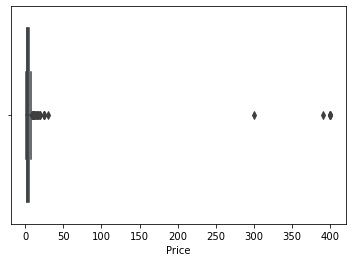

In [87]:
sns.boxplot(paid_10k_apps['Price'])

<AxesSubplot:>

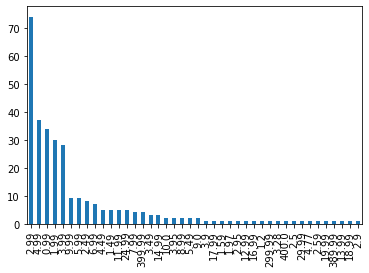

In [88]:
paid_10k_apps['Price'].value_counts().plot(kind='bar')

(0.0, 50.0)

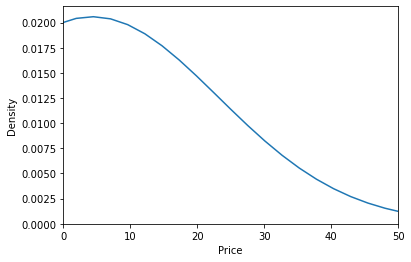

In [89]:
sns.kdeplot(paid_10k_apps['Price'])
plt.xlim(0,50)

In [90]:
paid_10k_apps['Price'].value_counts(normalize=True).iloc[:5]

2.99    0.246667
4.99    0.123333
0.99    0.113333
1.99    0.100000
3.99    0.093333
Name: Price, dtype: float64

In [91]:
#~25% paid apps are priced 2.99$

In [92]:
paid_10k_apps['Installs'].unique()

array([  100000,    10000,   500000,    50000, 10000000,  1000000])

In [93]:
paid_10k_apps[paid_10k_apps['Installs']==10000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2241,Minecraft,FAMILY,4.5,2376564.0,28.319251,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device
4034,Hitman Sniper,GAME,4.6,408292.0,29.000000,10000000,Paid,0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up
4347,Minecraft,FAMILY,4.5,2375336.0,28.319251,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device


In [94]:
paid_10k_apps.duplicated()

234      False
235      False
290       True
291       True
427      False
         ...  
10645    False
10679    False
10682    False
10782    False
10785    False
Length: 300, dtype: bool

In [95]:
paid_10k_apps.loc[290]

App               TurboScan: scan documents and receipts in PDF
Category                                               BUSINESS
Rating                                                      4.7
Reviews                                                 11442.0
Size                                                        6.8
Installs                                                 100000
Type                                                       Paid
Price                                                      4.99
Content Rating                                         Everyone
Genres                                                 Business
Last Updated                                     March 25, 2018
Current Ver                                               1.5.2
Android Ver                                          4.0 and up
Name: 290, dtype: object

In [96]:
paid_10k_apps.loc[291]

App               Tiny Scanner Pro: PDF Doc Scan
Category                                BUSINESS
Rating                                       4.8
Reviews                                  10295.0
Size                                        39.0
Installs                                  100000
Type                                        Paid
Price                                       4.99
Content Rating                          Everyone
Genres                                  Business
Last Updated                      April 11, 2017
Current Ver                                3.4.6
Android Ver                           3.0 and up
Name: 291, dtype: object

In [97]:
paid_10k_apps[paid_10k_apps['App']=='Tiny Scanner Pro: PDF Doc Scan']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295.0,39.0,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295.0,39.0,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up


In [98]:
paid_10k_apps['App'].duplicated

<bound method Series.duplicated of 234      TurboScan: scan documents and receipts in PDF
235                     Tiny Scanner Pro: PDF Doc Scan
290      TurboScan: scan documents and receipts in PDF
291                     Tiny Scanner Pro: PDF Doc Scan
427                                 Puffin Browser Pro
                             ...                      
10645                     Football Manager Mobile 2018
10679                                       Solitaire+
10682                              Fruit Ninja Classic
10782                          Trine 2: Complete Story
10785                                     sugar, sugar
Name: App, Length: 300, dtype: object>

In [99]:
df['App'].duplicated().value_counts()

False    9648
True     1181
Name: App, dtype: int64

In [100]:
df1 = df.drop_duplicates('App')

In [101]:
df1.shape

(9648, 13)

In [102]:
appswith10k = df1[df1['Installs']>=10000]

In [103]:
paid10kapps = appswith10k[appswith10k['Type']=='Paid']

In [104]:
paid10kapps[paid10kapps['Installs']==10000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2241,Minecraft,FAMILY,4.5,2376564.0,28.319251,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device
4034,Hitman Sniper,GAME,4.6,408292.0,29.000000,10000000,Paid,0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up


In [105]:
df.loc[df['App'].duplicated(), :]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805.0,14.472162,5000000,Free,0.0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872.0,14.472162,10000000,Free,0.0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991.0,14.472162,5000000,Free,0.0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614.0,37.000000,10000000,Free,0.0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989.0,14.472162,1000000,Free,0.0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145.0,1.400000,100000,Free,0.0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981.0,4.000000,1000000,Free,0.0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410.0,60.000000,50000,Free,0.0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599.0,12.000000,1000000,Free,0.0,Everyone,Shopping,"July 30, 2018",3.9,4.4 and up


In [106]:
df[df['App']=='Slickdeals: Coupons & Shopping']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2765,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33583.0,12.0,1000000,Free,0.0,Everyone,Shopping,"July 30, 2018",3.9,4.4 and up
2793,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33583.0,12.0,1000000,Free,0.0,Everyone,Shopping,"July 30, 2018",3.9,4.4 and up
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599.0,12.0,1000000,Free,0.0,Everyone,Shopping,"July 30, 2018",3.9,4.4 and up


In [107]:
new_df = pd.read_csv(r'C:\Users\Syed Azeemuddin\Downloads\sem7 notes\HT\datasets\Play Store Data.csv')

In [108]:
new_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
Length: 10841, dtype: bool

In [110]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [141]:
clean_data = df.copy